# Machine Learning with Decision Tree Classifier

This notebook walks through decision tree classifier by using the *Iris* data set.

- Import Libraries
- Prepare Data
- Model Fitting
- Visualization

## Import Libraries

In [99]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import tree
from matplotlib.pyplot import figure
from dtreeviz.trees import dtreeviz

In [100]:
iris = load_iris()

In [101]:
X = iris.data
y = iris.target

In [102]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [103]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
X_pd = pd.DataFrame(X, columns=iris.feature_names)
y_pd = pd.DataFrame(y)

## Prepare Data

In [105]:
def prep_data(X_pd, y_pd):
    '''Prep data: take two dataframes and convert to numpy'''
    X = X_pd.to_numpy()
    y = y_pd.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [106]:
X_train, X_test, y_train, y_test = prep_data(X_pd, y_pd)

(112, 4) (38, 4) (112, 1) (38, 1)


## Model Fitting

In [107]:
def fit_decision_tree(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    print("Depth: ", dt.get_depth())
    print("Number of leaves: ", dt.get_n_leaves())
    return dt

In [108]:
dt = fit_decision_tree(X_train, y_train)

Depth:  4
Number of leaves:  8


## Visualization

In [109]:
def visualize_tree(dt, data, type=0):
    if type == 0:
        fig = figure(figsize=(30,20))
        _ = tree.plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
    if type == 1:
        viz = dtreeviz(dt, data.data, data.target, target_name='target',
                       feature_names=data.feature_names, 
                       class_names=data.target_names.tolist())

In [110]:
visualize_tree(dt, iris, type=1)

In [111]:
def evaluate(dt, X_test, y_test):
    print("Score: ", dt.score(X_test, y_test))
    plot_confusion_matrix(dt, X_test, y_test)

Score:  0.9736842105263158


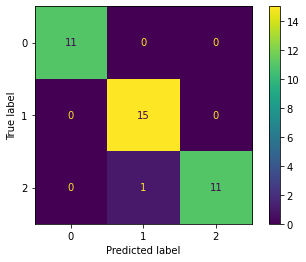

In [119]:
evaluate(dt, X_test, y_test)